In [19]:
import yfinance as yf
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# отримуємо дані з  Yahoo Finance

stock_name = 'TSLA'
data = yf.download(stock_name, start="2020-03-26", end="2021-03-29")

[*********************100%***********************]  1 of 1 completed


In [20]:
# обираємо ціну Close акції
data = data.filter(['Close'])
# конвертуємо дані у масив
dataset = data.values
# кількість даних для тренування моделі - 80%, тест - 20%
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

204

In [21]:
# масштабування даних відносно відрізку від 0 до 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02140379],
       [0.01860399],
       [0.01512   ],
       [0.01203238],
       [0.01755374],
       [0.00683922],
       [0.        ],
       [0.0064479 ],
       [0.01559463],
       [0.02296906],
       [0.02382491],
       [0.02992441],
       [0.04960389],
       [0.06448404],
       [0.06951815],
       [0.07340104],
       [0.0755924 ],
       [0.07369136],
       [0.05863447],
       [0.07009376],
       [0.06340856],
       [0.06833662],
       [0.08691788],
       [0.07943742],
       [0.08736223],
       [0.08265885],
       [0.06232045],
       [0.07743539],
       [0.07920767],
       [0.08283557],
       [0.0821943 ],
       [0.09213629],
       [0.09008376],
       [0.08960914],
       [0.0849512 ],
       [0.08807416],
       [0.08702392],
       [0.09067453],
       [0.0892557 ],
       [0.09116178],
       [0.09420144],
       [0.09149504],
       [0.09199744],
       [0.09234079],
       [0.08870027],
       [0.09606966],
       [0.11200005],
       [0.107

In [22]:
# створюємо масштабований масив даних
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02140379, 0.01860399, 0.01512   , 0.01203238, 0.01755374,
       0.00683922, 0.        , 0.0064479 , 0.01559463, 0.02296906,
       0.02382491, 0.02992441, 0.04960389, 0.06448404, 0.06951815,
       0.07340104, 0.0755924 , 0.07369136, 0.05863447, 0.07009376,
       0.06340856, 0.06833662, 0.08691788, 0.07943742, 0.08736223,
       0.08265885, 0.06232045, 0.07743539, 0.07920767, 0.08283557,
       0.0821943 , 0.09213629, 0.09008376, 0.08960914, 0.0849512 ,
       0.08807416, 0.08702392, 0.09067453, 0.0892557 , 0.09116178,
       0.09420144, 0.09149504, 0.09199744, 0.09234079, 0.08870027,
       0.09606966, 0.11200005, 0.10782432, 0.10817777, 0.10348702,
       0.10885943, 0.12508267, 0.1227474 , 0.1440502 , 0.13086912,
       0.12138663, 0.1354286 , 0.1332145 , 0.1356533 , 0.13872578])]
[0.13795322292877032]

[array([0.02140379, 0.01860399, 0.01512   , 0.01203238, 0.01755374,
       0.00683922, 0.        , 0.0064479 , 0.01559463, 0.02296906,
       0.02382491, 0.02992441, 0.04

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Будуємо LSTM модель
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.35))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1))
# Компіляція
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Тренування
model.fit(x_train, y_train, batch_size=1, epochs=21)

Epoch 1/21
144/144 [==============================] - 4s 15ms/step - loss: 0.0669 - accuracy: 0.0000e+00
Epoch 2/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 3/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 4/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 5/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 6/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 7/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 8/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 9/21
144/144 [==============================] - 2s 15ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 10/21
144/144 [==============================] - 

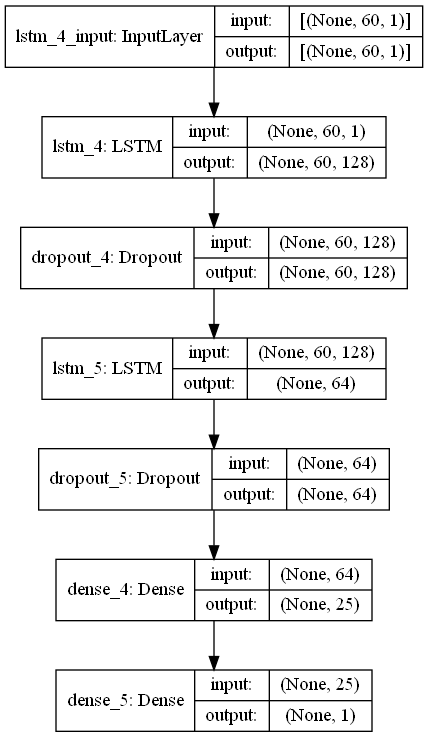

In [24]:
# Малюємо структуру моделі
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [25]:
# Створюємо сет даних для тестування моделі
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Передбачення на основі тестових даних
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Знаходимо похибку
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

70.64085847744731


c:\users\admin\pycharmprojects\kurs4_2\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


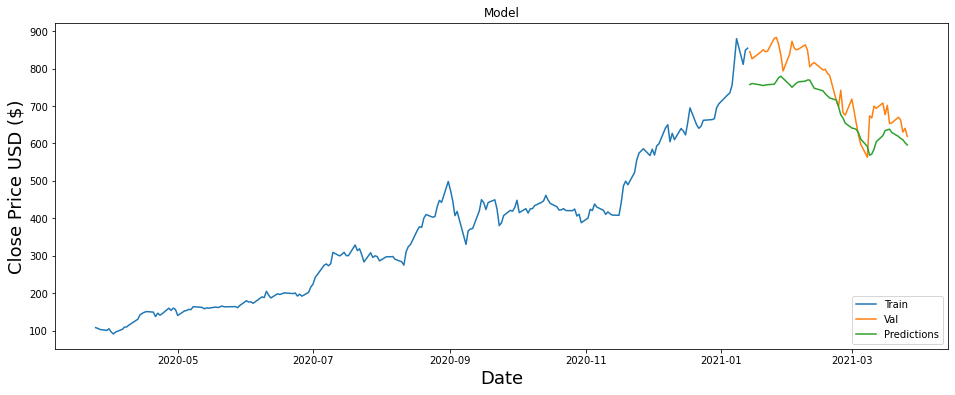

In [26]:
# Малюємо графік
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


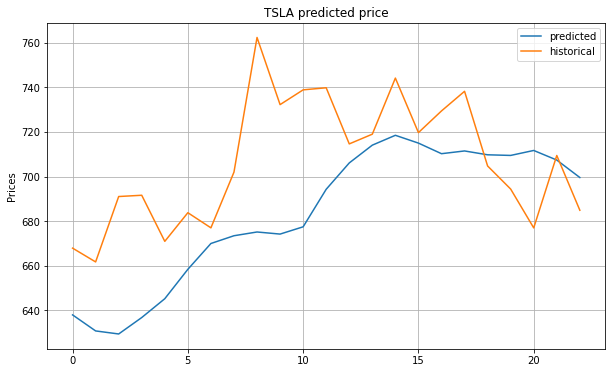

In [27]:
# Робимо передбачення на наступний місяць
data_new = yf.download(stock_name, start="2021-03-01", end="2021-04-30")

data_new = data_new.filter(['Close'])
dataset = data_new.values
training_data_len = len(dataset)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

test_data = scaled_data[training_data_len - len(data_new): , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

hist_data_new = yf.download(stock_name, start="2021-04-01", end="2021-05-04")
hist_data_new = hist_data_new.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
hist_data_new = hist_data_new['Close']
hist_data_new = np.array(hist_data_new)
pred_lstm = model.predict(x_test)
pred_lstm = scaler.inverse_transform(pred_lstm)
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.ylabel('Prices')
plt.plot(pred_lstm, label = 'predicted')
plt.plot(hist_data_new, label = 'historical')
plt.title(f'{stock_name} predicted price')
plt.legend()
plt.show()